The goal of this notebook is to explore possible feature engineering options to improve the models. 
Option 1: Add hospital ID as a feature

In [1]:
#All imports
import pandas as pd
import pickle
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier


import seaborn as sns
import statsmodels.api as sm
import sklearn



In [2]:
#Load healthgrades data
df_doc = pd.read_pickle('HealthgradesNymagClean.pkl')
df_doc = df_doc.set_index('fullname')
#Load publications dictionary for each name
pub_dict = pickle.load(open( "pubmedlist.pkl", "rb" ))
#Load publications dataframe
df_pub = pd.read_pickle('ArticleDetails.pkl')
df_pub = df_pub.rename(index=str, columns={"Citation Number": "CitationNumber"})



In [3]:
#Visualize data to see if it makes sense
df_doc.head()

,aboutMe,address.line1,address.line2,affiliatedHospitalIDs,age,gender,isRecommendedProvider,payorCount,premiumDisplayOasLabel,providerSponsorships,specialistDesc,surveyOverallRatingPercent,surveyOverallRatingScore,surveyStarRatingScore,surveyUserCount,yearsSinceGraduation,isbest,Number_pub
fullname,,,,,,,,,,,,,,,,,,
Sylvia Adams,"Dr. Sylvia Adams, MD is an Oncology Specialist...",160 E 34th St Fl 4,"New York, NY 10016",[HGST7FF97B36330214],48.0,F,True,0,call,NaN,"[Oncology Specialist, Hematology Specialist, I...",96.0,10.0,10.0,36.0,23.0,False,36
Morton Coleman,"Dr. Morton Coleman, MD is a Hematology Special...",407 E 70th St Fl 3,"New York, NY 10021",[HGST750A7B36330101],78.0,M,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",96.0,10.0,10.0,16.0,55.0,False,90
Karen Haglof,"Dr. Karen Haglof, MD is a Hematology Specialis...",157 E 32nd St Fl 2,"New York, NY 10016",[HGST7FF97B36330214],62.0,F,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",88.0,9.0,9.0,14.0,19.0,False,1
Michael Grossbard,Dr. Grossbard is the Director of the Hematolog...,240 E 38th St Fl 19,"New York, NY 10016",[HGST7FF97B36330214],57.0,M,False,0,static,NaN,"[Oncology Specialist, Hematology Specialist, I...",70.0,7.0,7.0,10.0,32.0,True,39
Jeffrey Tepler,"Dr. Jeffrey Tepler, MD is a Hematology Special...",310 E 72nd St Fl 1,"New York, NY 10021",[HGST750A7B36330101],60.0,M,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",100.0,10.0,10.0,8.0,36.0,False,1


In [4]:
#check for 500 publications (this was limit in search term
for doctor in df_doc.index:
    if df_doc.loc[doctor,'Number_pub'] == 500: print(df_doc.loc[doctor])


aboutMe                       Praddep Chandra, MB is a Hematology Specialist...
address.line1                                                 1545 Atlantic Ave
address.line2                                                Brooklyn, NY 11213
affiliatedHospitalIDs                                                       NaN
age                                                                          68
gender                                                                        M
isRecommendedProvider                                                     False
payorCount                                                                    0
premiumDisplayOasLabel                                                     call
providerSponsorships                                                        NaN
specialistDesc                [Hematology Specialist, Oncology Specialist, I...
surveyOverallRatingPercent                                                  NaN
surveyOverallRatingScore                

In [5]:
#an anomaly, delete
df_doc.drop('Praddep Chandra',axis = 0)

,aboutMe,address.line1,address.line2,affiliatedHospitalIDs,age,gender,isRecommendedProvider,payorCount,premiumDisplayOasLabel,providerSponsorships,specialistDesc,surveyOverallRatingPercent,surveyOverallRatingScore,surveyStarRatingScore,surveyUserCount,yearsSinceGraduation,isbest,Number_pub
fullname,,,,,,,,,,,,,,,,,,
Sylvia Adams,"Dr. Sylvia Adams, MD is an Oncology Specialist...",160 E 34th St Fl 4,"New York, NY 10016",[HGST7FF97B36330214],48.0,F,True,0,call,NaN,"[Oncology Specialist, Hematology Specialist, I...",96.0,10.0,10.0,36.0,23.0,False,36
Morton Coleman,"Dr. Morton Coleman, MD is a Hematology Special...",407 E 70th St Fl 3,"New York, NY 10021",[HGST750A7B36330101],78.0,M,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",96.0,10.0,10.0,16.0,55.0,False,90
Karen Haglof,"Dr. Karen Haglof, MD is a Hematology Specialis...",157 E 32nd St Fl 2,"New York, NY 10016",[HGST7FF97B36330214],62.0,F,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",88.0,9.0,9.0,14.0,19.0,False,1
Michael Grossbard,Dr. Grossbard is the Director of the Hematolog...,240 E 38th St Fl 19,"New York, NY 10016",[HGST7FF97B36330214],57.0,M,False,0,static,NaN,"[Oncology Specialist, Hematology Specialist, I...",70.0,7.0,7.0,10.0,32.0,True,39
Jeffrey Tepler,"Dr. Jeffrey Tepler, MD is a Hematology Special...",310 E 72nd St Fl 1,"New York, NY 10021",[HGST750A7B36330101],60.0,M,True,0,call,NaN,"[Hematology Specialist, Oncology Specialist, I...",100.0,10.0,10.0,8.0,36.0,False,1
Francisco Esteva,"Dr. Francisco Esteva, MD is an Oncology Specia...",160 E 34th St Fl 4,"New York, NY 10016",[HGST7FF97B36330214],54.0,M,True,0,call,NaN,"[Oncology Specialist, Hematology Specialist]",100.0,10.0,10.0,1.0,30.0,False,145
Cynthia Leichman,"Dr. Cynthia Leichman, MD is an Oncology Specia...",160 E 34th St Fl 9,"New York, NY 10016",[HGST7FF97B36330214],62.0,F,True,0,call,NaN,"[Oncology Specialist, Hematology Specialist, I...",100.0,10.0,10.0,2.0,41.0,False,17
Vicky Makker,"Dr. Vicky Makker, MD is an Oncology Specialist...",300 E 66th St,"New York, NY 10065","[HGSTF40A7B36330154, HGST3A0A7B36330012]",41.0,F,True,0,call,NaN,"[Oncology Specialist, Internist]",98.0,10.0,10.0,7.0,15.0,False,20
Daniel Cho,"Dr. Daniel Cho, MD is an Oncology Specialist w...",160 E 34th St Fl 8,"New York, NY 10016",[HGST7FF97B36330214],43.0,M,True,0,call,NaN,"[Oncology Specialist, Hematology Specialist]",100.0,10.0,10.0,2.0,18.0,False,34


In [6]:
#Create feature vectors for hospital IDs
#First see number of unique hospital IDS
Hosp_IDlist = []
for IDlist in df_doc.affiliatedHospitalIDs: 
    if type(IDlist) is list :
        for ID in IDlist:
            if not ID in Hosp_IDlist: Hosp_IDlist.append(ID)
            


In [7]:
#check total number of hospital IDs
len(Hosp_IDlist)

45

In [8]:
#create a function that takes two inputs, doctor and hospital ID
# and returns true or false if that doctor is affilliated with the hospital
def affiliated(doctorname,Hosp_ID):
    if type(df_doc.loc[doctorname,'affiliatedHospitalIDs']) is list:
        if Hosp_ID in df_doc.loc[doctorname,'affiliatedHospitalIDs']:
            return 1.0
        else: return 0.0
    else: return 0.0

In [9]:
#test the function
affiliated('Jeffrey Tepler','HGST7FF97B36330214')

0.0

In [10]:
#test the function
affiliated('Jeffrey Tepler','HGST750A7B36330101')

1.0

In [11]:
#apply to all doctors for any hospital ID
for ID in Hosp_IDlist:
    df_doc[ID] = pd.Series(df_doc.index, index = df_doc.index).apply(lambda x: affiliated(x,ID))

In [12]:
df_doc.HGST750A7B36330101.sum()

53.0

In [13]:
df_doc.head()

,aboutMe,address.line1,address.line2,affiliatedHospitalIDs,age,gender,isRecommendedProvider,payorCount,premiumDisplayOasLabel,providerSponsorships,...,HGST87380596310038,HGST4D8B6BC6520177,HGSTF9797B36340061,HGSTD00A7B36330185,HGSTD2238D46100271,HGST460B7B36030103,HGSTA5380596310008,HGSTC6380596310025,HGST600A7B36330231,HGST11346F56140088
fullname,,,,,,,,,,,,,,,,,,,,,
Sylvia Adams,"Dr. Sylvia Adams, MD is an Oncology Specialist...",160 E 34th St Fl 4,"New York, NY 10016",[HGST7FF97B36330214],48.0,F,True,0,call,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Morton Coleman,"Dr. Morton Coleman, MD is a Hematology Special...",407 E 70th St Fl 3,"New York, NY 10021",[HGST750A7B36330101],78.0,M,True,0,call,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Karen Haglof,"Dr. Karen Haglof, MD is a Hematology Specialis...",157 E 32nd St Fl 2,"New York, NY 10016",[HGST7FF97B36330214],62.0,F,True,0,call,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Michael Grossbard,Dr. Grossbard is the Director of the Hematolog...,240 E 38th St Fl 19,"New York, NY 10016",[HGST7FF97B36330214],57.0,M,False,0,static,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jeffrey Tepler,"Dr. Jeffrey Tepler, MD is a Hematology Special...",310 E 72nd St Fl 1,"New York, NY 10021",[HGST750A7B36330101],60.0,M,True,0,call,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_pub.head()

,ArticleTitle,JournalTitle,JournalYear,Abstract,CitationNumber
10374832,"Evaluation of butylated hydroxyanisole, myo-in...",Cancer letters,1999,The potential activities of butylated hydroxya...,122.0
10426810,Tumorigenicity and metabolism of 4-(methylnitr...,Carcinogenesis,1999,4-(Methylnitrosamino)-1-(3-pyridyl)-1-butanol ...,75.0
10435157,The effect of granulocyte colony-stimulating f...,Oral oncology,1999,We investigated the effect of granulocyte colo...,31.0
10543400,Evaluation of the protein truncation test and ...,Human genetics,1999,The neurofibromatosis type 1 (NF1) gene locate...,27.0
10593996,Unusual clustering of brain tumours in a famil...,Journal of medical genetics,1999,Neurofibromatosis type 1 (NF1) is one of the c...,5.0


In [15]:
#Write a function to calculate i-10 index for a given doctor, 
#which is the number of publications an author gets >10 citations on
#inputs are doctor name and list of publications
def i10_score(doctorname):
    #make a list of Ids in the dataframe
    uid_list = []
    for uid in pub_dict[doctorname]:
        if uid in df_pub.index: uid_list.append(uid)
    citations_series = df_pub.loc[uid_list,'CitationNumber']
    return np.sum((citations_series>5.0))
    

In [16]:
#test the above function
i10_score('Sylvia Adams')

30

In [17]:
#create a column with i10-score
df_doc['i10_score'] = pd.Series(df_doc.index, index = df_doc.index).apply(lambda x: i10_score(x))    

In [18]:
#create a column with TOTAL number of citations
def totalcit(doctorname):
    #make a list of Ids in the dataframe
    uid_list = []
    for uid in pub_dict[doctorname]:
        if uid in df_pub.index: uid_list.append(uid)
    citations = df_pub.loc[uid_list,'CitationNumber'].sum()
    return citations

In [19]:
#test the above funciton
totalcit('Sylvia Adams')

2195.0

In [20]:
df_doc['totalcit'] = pd.Series(df_doc.index, index = df_doc.index).apply(lambda x: totalcit(x))    

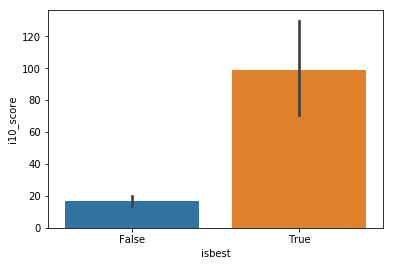

In [21]:
#check if trends exist for i10_score and totalcit
sns.barplot(x = df_doc.isbest, y = df_doc.i10_score)

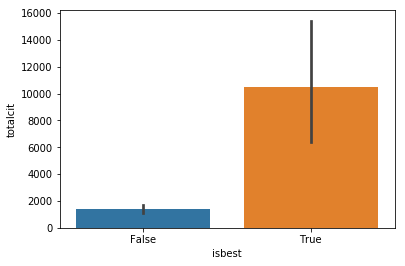

In [22]:
sns.barplot(x = df_doc.isbest, y = df_doc.totalcit)

Prepare dataframe for model

In [23]:
df_doc.head()

,aboutMe,address.line1,address.line2,affiliatedHospitalIDs,age,gender,isRecommendedProvider,payorCount,premiumDisplayOasLabel,providerSponsorships,...,HGSTF9797B36340061,HGSTD00A7B36330185,HGSTD2238D46100271,HGST460B7B36030103,HGSTA5380596310008,HGSTC6380596310025,HGST600A7B36330231,HGST11346F56140088,i10_score,totalcit
fullname,,,,,,,,,,,,,,,,,,,,,
Sylvia Adams,"Dr. Sylvia Adams, MD is an Oncology Specialist...",160 E 34th St Fl 4,"New York, NY 10016",[HGST7FF97B36330214],48.0,F,True,0,call,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,2195.0
Morton Coleman,"Dr. Morton Coleman, MD is a Hematology Special...",407 E 70th St Fl 3,"New York, NY 10021",[HGST750A7B36330101],78.0,M,True,0,call,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77,4674.0
Karen Haglof,"Dr. Karen Haglof, MD is a Hematology Specialis...",157 E 32nd St Fl 2,"New York, NY 10016",[HGST7FF97B36330214],62.0,F,True,0,call,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
Michael Grossbard,Dr. Grossbard is the Director of the Hematolog...,240 E 38th St Fl 19,"New York, NY 10016",[HGST7FF97B36330214],57.0,M,False,0,static,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,1440.0
Jeffrey Tepler,"Dr. Jeffrey Tepler, MD is a Hematology Special...",310 E 72nd St Fl 1,"New York, NY 10021",[HGST750A7B36330101],60.0,M,True,0,call,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,144.0


In [24]:
#use isrecommended provider column, convert nans to 0
is_rec = df_doc.isRecommendedProvider*1.0
is_rec = is_rec.fillna(0.0)
df_doc['is_Rec'] = is_rec

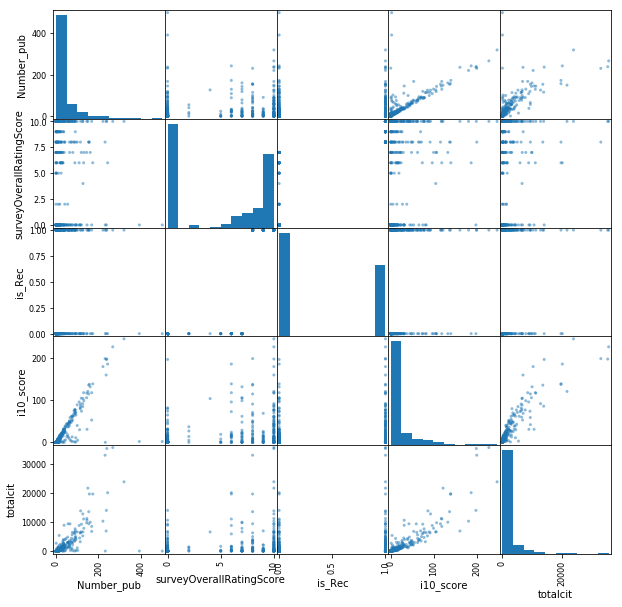

In [25]:
#check for correlations in data
ind_cols=['Number_pub','surveyOverallRatingScore','is_Rec','i10_score','totalcit']

a = pd.plotting.scatter_matrix(df_doc[ind_cols],alpha=0.5,figsize=(10,10), diagonal='hist')


In [91]:
#convert number of publications to float
df_doc.Number_pub = df_doc.Number_pub.astype(float)

#fill all na columns in i10_score with 0
df_doc['i10_score'] = df_doc['i10_score'].fillna(value=0)

#use isrecommended provider column, convert nans to 0
is_rec = df_doc.isRecommendedProvider*1.0
is_rec = is_rec.fillna(0.0)
df_doc['is_Rec'] = is_rec

In [92]:
#split into X and Y
ind_cols=['Number_pub','surveyOverallRatingScore','is_Rec','i10_score','totalcit']
#ind_cols+=(Hosp_IDlist)

In [93]:

y = df_doc.isbest*1.0
X = df_doc[ind_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 1)

In [94]:
#do a basic logistic regression and check fit
model0 = linear_model.LogisticRegression().fit(X_train,y_train)
pred_y_0 = model0.predict(X_train)
prob_y_0 = model0.predict_proba(X_train)
prob_y_0 = [p[1] for p in prob_y_0]
print( roc_auc_score(y_train, prob_y_0) )

0.8989381873340918


In [95]:
#see confusion matrix
confusion_matrix(y_train,pred_y_0)


array([[290,   3],
       [ 13,   5]])

In [96]:
#see f1 score
f1_score(y_train,pred_y_0)

0.3846153846153846

In [97]:
# now attempt a weighted logistic regression
class_w= {0.0: 1, 1.0: 10}

In [98]:
model1 = linear_model.LogisticRegression(class_weight = class_w).fit(X_train,y_train)
pred_y_1 = model1.predict(X_train)
prob_y_1 = model1.predict_proba(X_train)
prob_y_1 = [p[1] for p in prob_y_1]
print( roc_auc_score(y_train, prob_y_1) )


0.9233978005309064


In [99]:
confusion_matrix(y_train,pred_y_1)

array([[262,  31],
       [  6,  12]])

In [100]:
#see f1 score
f1_score(y_train,pred_y_1)

0.3934426229508197

In [101]:
#Now try a Random Forests Classifier
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
pred_y_2 = model2.predict(X_train)
prob_y_2 = model2.predict_proba(X_train)
prob_y_2 = [p[1] for p in prob_y_2]
print( roc_auc_score(y_train, prob_y_2) )


1.0


In [102]:
confusion_matrix(y_train,pred_y_2)

array([[293,   0],
       [  3,  15]])

In [103]:
#see f1 score
f1_score(y_train,pred_y_2)

0.9090909090909091

In [104]:
model2.feature_importances_

array([0.26333747, 0.12482887, 0.01961322, 0.22146432, 0.37075611])

In [105]:
model2.oob_score

False

In [106]:
#Now check performance on test set
pred_y_2_test = model2.predict(X_test)
prob_y_2_test = model2.predict_proba(X_test)
prob_y_2_test = [p[1] for p in prob_y_2_test]
print( roc_auc_score(y_test, prob_y_2_test) )

0.9407894736842105


In [107]:
confusion_matrix(y_test,pred_y_2_test)

array([[75,  1],
       [ 2,  0]])

In [75]:
#see f1 score
f1_score(y_test,pred_y_2_test)

0.0

Now try again but include hospital data

In [182]:
#split into X and Y
ind_cols=['Number_pub','surveyOverallRatingScore','is_Rec','i10_score','totalcit']
ind_cols+=(Hosp_IDlist)

In [183]:

y = df_doc.isbest*1.0
X = df_doc[ind_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 1)

In [185]:
#do a basic logistic regression and check fit
model3 = linear_model.LogisticRegression().fit(X_train,y_train)
pred_y_3 = model3.predict(X_train)
prob_y_3 = model3.predict_proba(X_train)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(y_train, prob_y_3) )

0.8902161547212741


In [186]:
#see confusion matrix
confusion_matrix(y_train,pred_y_3)


array([[290,   3],
       [ 12,   6]])

In [187]:
#see f1 score
f1_score(y_train,pred_y_3)

0.4444444444444444

In [188]:
# now attempt a weighted logistic regression
class_w= {0.0: 1, 1.0: 10}

In [189]:
model4 = linear_model.LogisticRegression(class_weight = class_w).fit(X_train,y_train)
pred_y_4 = model4.predict(X_train)
prob_y_4 = model4.predict_proba(X_train)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y_train, prob_y_4) )


0.9368600682593856


In [190]:
dir(model4)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_predict_proba_lr',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'max_iter',
 'multi_class',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'warm_start']

In [191]:
model4.coef_

array([[-4.70208855e-03,  1.55936089e-01,  6.45080684e-02,
         3.25212221e-02,  4.12697553e-06,  1.75373403e+00,
         1.71605754e-01,  1.09826171e+00,  6.78110913e-01,
        -7.57741937e-01,  5.45629608e-02, -3.94529498e-01,
        -6.67383228e-02, -1.77684165e-01,  1.78484752e+00,
        -6.08815041e-01, -2.96964566e-02, -5.09326943e-01,
        -1.76659486e-01, -2.57409688e-01, -2.57409688e-01,
        -2.46565681e-01, -1.98435747e-01, -7.61550024e-02,
        -9.81355997e-02, -9.73543942e-02, -5.62482147e-01,
        -2.98138748e-01, -5.62158771e-02, -5.62158771e-02,
        -5.62158771e-02, -7.34225136e-02, -9.81355997e-02,
        -3.86346605e-01, -2.98823994e-01, -2.98823994e-01,
         5.07076454e-01,  5.07076454e-01, -5.92070685e-02,
        -7.75029137e-02, -3.34531649e-02, -3.95997422e-02,
        -1.49999581e-01,  0.00000000e+00, -2.87596507e-02,
        -3.84394574e-01, -2.96965054e-02, -3.00741411e-02,
         0.00000000e+00, -4.46571173e-02]])

In [192]:
confusion_matrix(y_train,pred_y_4)

array([[262,  31],
       [  6,  12]])

In [193]:
#see f1 score
f1_score(y_train,pred_y_4)

0.3934426229508197

In [194]:
#Now try a Random Forests Classifier
model5 = RandomForestClassifier()
model5.fit(X_train, y_train)
pred_y_5 = model5.predict(X_train)
prob_y_5 = model5.predict_proba(X_train)
prob_y_5 = [p[1] for p in prob_y_5]
print( roc_auc_score(y_train, prob_y_5) )


1.0


In [195]:
model5.oob_score

False

In [196]:
confusion_matrix(y_train,pred_y_5)

array([[293,   0],
       [  2,  16]])

In [197]:
#see f1 score
f1_score(y_train,pred_y_5)

0.9411764705882353

In [198]:
#Now check performance on test set
pred_y_5_test = model5.predict(X_test)
prob_y_5_test = model5.predict_proba(X_test)
prob_y_5_test = [p[1] for p in prob_y_5_test]
print( roc_auc_score(y_test, prob_y_5_test) )

0.9671052631578948


In [199]:
confusion_matrix(y_test,pred_y_5_test)

array([[75,  1],
       [ 2,  0]])

In [200]:
#see f1 score
f1_score(y_test,pred_y_5_test)

0.0

In [227]:
#get most important features from Random forests and retry logistic regression 
fi = enumerate(model5.feature_importances_)
cols = X.columns
new_ind_cols = [cols[i] for (i,value) in fi if value > 0.01]

In [228]:
new_ind_cols

['Number_pub',
 'surveyOverallRatingScore',
 'is_Rec',
 'i10_score',
 'totalcit',
 'HGSTF40A7B36330154',
 'HGSTE20A7B36330169',
 'HGST9B346F56140281']

In [229]:
X_new = df_doc[new_ind_cols]
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2,random_state = 1)
model6 = linear_model.LogisticRegression(class_weight = class_w).fit(X_train,y_train)
pred_y_6 = model6.predict(X_train)
prob_y_6 = model6.predict_proba(X_train)
prob_y_6 = [p[1] for p in prob_y_6]
print( roc_auc_score(y_train, prob_y_6) )



0.9194160030337505


In [230]:
confusion_matrix(y_train,pred_y_6)

array([[261,  32],
       [  5,  13]])

In [231]:
f1_score(y_train,pred_y_6)

0.4126984126984127

In [232]:
#Now check performance on test set
pred_y_6_test = model6.predict(X_test)
prob_y_6_test = model6.predict_proba(X_test)
prob_y_6_test = [p[1] for p in prob_y_6_test]
print( roc_auc_score(y_test, prob_y_6_test) )

0.9605263157894737


In [233]:
confusion_matrix(y_test,pred_y_6_test)
#results in too many false positives. Lets try balancing classes?

array([[68,  8],
       [ 0,  2]])